# Startup Funding - case study part 1

<b>Dataset Details</b>
<br>
<br>
This dataset has funding information of the Indian startups from January 2015 to August 2017.
Feature Details :<br>
SNo - Serial number.<br>
Date - Date of funding in format DD/MM/YYYY.<br>
StartupName - Name of the startup which got funded.<br>
IndustryVertical - Industry to which the startup belongs.<br>
SubVertical - Sub-category of the industry type.<br>
CityLocation - City which the startup is based out of.<br>
InvestorsName - Name of the investors involved in the funding round.<br>
InvestmentType - Either Private Equity or Seed Funding.<br>
AmountInUSD - Funding Amount in USD.<br>
Remarks - Other information, if any.<br>
Insights -<br>
Find out what type of startups are getting funded in the last few years?<br>
Who are the important investors?<br>
What are the hot fields that get a lot of funding these days?<br>

<b>Number of Fundings</b><br>
<br>
Problem Statement :<br>
Check the trend of investments over the years. To check the trend, find -<br>
Total number of fundings done in each year.<br>
Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.<br>
Print year-wise total number of fundings also. Print years in ascending order.<br>
Note :<br>
There is some error in the 'Date' feature. Make sure to handle that.<br>

2015 936
2016 993
2017 443


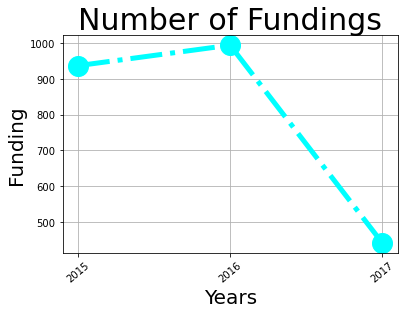

<Figure size 1152x648 with 0 Axes>

In [1]:

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
# print(df["Date"].isnull().sum())
with open("startup_funding.csv") as file_obj:
    file_data = csv.DictReader(file_obj)
    date = []
    for row in file_data:
        date.append(row["Date"])
# print(date)
npdate = np.array(date)
year = []
for i in npdate:
    year.append(i[-4::])
npy = np.array(year)
np.sort(npy)
unpy = np.unique(npy, return_counts=True)
y = unpy[0]
f = unpy[1]
for i in range(y.size):
    print(y[i], f[i])

"""Plotting Graph"""
plt.plot(y, f, linewidth=5, linestyle="-.", marker="o", markersize=20, color = "cyan")
style.use('ggplot')
plt.title("Number of Fundings", size=30)
plt.xlabel("Years", size=20)
plt.xticks(rotation=40)
plt.ylabel("Funding", size=20)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()

<b>Top Indian Cities</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Find out which cities are generally chosen for starting a startup.<br>
Find top 10 Indian cities which have most number of startups ?<br>
Plot a pie chart and visualise it.<br>
Print the city name and number of startups in that city also.<br>
Note :<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.<br>
Print the city in descending order with respect to the number of startups.<br>

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


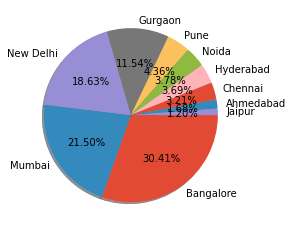

In [2]:

startup = pd.read_csv('startup_funding.csv')
df = startup.copy()
city = df['CityLocation']
city.dropna(inplace=True)
city = city.values
city[city == 'bangalore'] = 'Bangalore'
city[city == 'Delhi']= 'New Delhi'
count = 0
for i in range(city.size):
    if ' /' in city[i]:
        var = city[i].split(' /')
        city[i] = var[0]
    if '/' in city[i]:
        var = city[i].split('/')
        city[i] = var[0]
c,s = np.unique(city,return_counts=True)
cf = []
sf = []
max = 0
indi = 0
for j in range(10):
    for i in range(s.size):
        indi = np.argmax(s)
    cf.append(c[indi])
    print(c[indi],s[indi])
    sf.append(s[indi])
    max = 0
    s[indi] = 0
plt.pie(sf,labels = cf,counterclock = False,shadow = True,autopct= '%.2f%%')
plt.show()


<b>Funding amount</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Find out if cities play any role in receiving funding.<br>
Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).<br>
Print the city and percentage with 2 decimal place after rounding off.<br>
Note:<br>
Take city name "Delhi" as "New Delhi".<br>
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".<br>
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.<br>
Print the city in descending order with respect to the percentage of funding.<br>

In [3]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
f = df["AmountInUSD"]
f.fillna(0, inplace = True)
fund = f.values
for i in range(fund.size):
    temp = ""
    if fund[i] == 0:
        continue
    for j in range(len(fund[i])):
        if fund[i][j] == ",":
            continue
        temp = temp + fund[i][j]
    fund[i] = temp
fund= np.array(fund,dtype=int)
# print(fund)
c = df["CityLocation"]
c.fillna("xx", inplace=True)
city = c.values
city[city == "Delhi"] = "New Delhi"
city[city == "bangalore"] = "Bangalore"
for i in range(city.size):
    if "/" in city[i]:
        city[i] = city[i].split("/")
        if city[i][0][-1] == " ":
            city[i] = city[i][0][:-1]
        else:
            city[i] = city[i][0]

# print(city)
# ind= np.where(city == "Bangalore")
# # print(ind)
# print(np.sum(fund[ind]))
d = {}
# city = list(city)
# print(len(city), len(fund))
# fund = list(fund)
for i in range(fund.size):
    if city[i] in d:
        d[city[i]] += fund[i]
        # print(fund[i], "add")
    else:
        d[city[i]] = fund[i]
        # print(fund[i], "first add")

for i in d:
    d[i] = abs(d[i])
# print(d)
f = []
cit = []
d["xx"] = 0
for x in range(10):
    maxfund = 0
    for i in d:
        if d[i] > maxfund:
            maxfund = d[i]
            maxcity = i
    f.append(maxfund)
    cit.append(maxcity)
    d[maxcity] = 0
# print(f)
# print(cit)
f = np.array(f, dtype="int64")
# print(f.dtype)
s = abs(np.sum(f))
# print(s)
for i in range(len(cit)):
    per = format(((f[i] / s) * 100), ".2f")
    print(cit[i], per)


Gurgaon 29.85
Mumbai 27.99
New Delhi 21.31
Chennai 5.93
Pune 5.29
Hyderabad 2.82
Noida 2.46
Bangalore 2.41
Ahmedabad 1.42
Jaipur 0.51


<ipython-input-3-6cce136dafe3>:40: RuntimeWarning: overflow encountered in long_scalars
  d[city[i]] += fund[i]


<b>Investment Type</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
There are 4 different type of investments. Find out percentage of amount funded for each investment type.<br>
Plot a pie chart to visualise.<br>
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.<br>
Note :<br>
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.<br>
Print the investment type in descending order with respect to the percentage of the amount funded.<br>

Private Equity 70.85
Seed Funding 28.47
Debt Funding 0.67
Crowd Funding 0.01


<ipython-input-4-bbe51e9461a5>:33: RuntimeWarning: overflow encountered in long_scalars
  d[inv[i]] += fund[i]


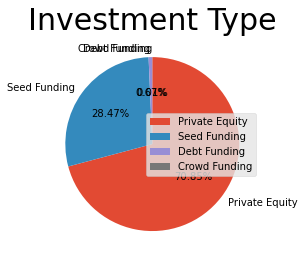

<Figure size 1152x648 with 0 Axes>

In [4]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
inv = df["InvestmentType"].values
# print(inv.size)
# print(inv)
# x = np.unique(list(inv), return_counts=True)
# print(x[0])
inv[inv == "Crowd funding"] = 'Crowd Funding'
inv[inv == 'SeedFunding'] = 'Seed Funding'
inv[inv == 'PrivateEquity'] = 'Private Equity'

# print(inv)
# print()
# x = np.unique(list(inv), return_counts=True)
# print(x[0])
df["AmountInUSD"].fillna(0, inplace=True)
# print(df["AmountInUSD"].isnull().sum())
fund = df["AmountInUSD"].values
for i in range(len(fund)):
    if fund[i] == 0:
        continue
    temp = ""
    for j in range(len(fund[i])):
        if fund[i][j] == ",":
            continue
        temp = temp + fund[i][j]
    fund[i] = temp
fund = np.array(fund, dtype=int)

d = {}
for i in range(inv.size):
    if inv[i] in d:
        d[inv[i]] += fund[i]
    else:
        d[inv[i]] = fund[i]
del d[np.nan]
# print(d)
# print(len(d))
invest = []
# invest = np.array(invest)
# print(type(invest))
# print("invest")
# print(invest)
# finv = []
funding = []

# ffund = []
for i in d:
    invest.append(i)
    funding.append(d[i])

finv =[]
ffund = []
for i in range(len(invest)):
    ind = np.argmax(funding)
    finv.append(invest[ind])
    ffund.append(funding[ind])
    funding[ind] = 0
# print()
# print(finv)
# print(ffund)

s = sum(ffund)
# print(s)
for i in range(len(ffund)):
    per = format(((ffund[i] / s) * 100), ".2f")
    print(finv[i], per)

"""Plot Pie Chart"""

plt.pie(ffund, labels=finv, autopct="%.2f%%", counterclock=False, startangle=90)
plt.legend(loc = "center right")
style.use('ggplot')
plt.title("Investment Type", size=30)
plt.grid()
plt.figure(figsize=(16, 9))
plt.show()


<b>Top Industries</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Which type of companies got more easily funding. To answer this question, find -<br>
Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)<br>
Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.<br>
Note :<br>
Ecommerce is the right word in IndustryVertical, so correct it.<br>
Print the industry in descending order with respect to the percentage of the amount funded.<br>

In [5]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
df["IndustryVertical"].fillna("xx", inplace=True)
industry = df["IndustryVertical"].values
industry[industry == "eCommerce"] = "Ecommerce"
industry[industry == "ecommerce"] = "Ecommerce"
industry[industry == "ECommerce"] = "Ecommerce"
# print(industry[industry == "Ecommerce"])
# print(industry)
df["AmountInUSD"].fillna(0, inplace=True)
fund = df["AmountInUSD"].values
for i in range(len(fund)):
    if fund[i] == 0:
        continue
    temp = ""
    for j in range(len(fund[i])):
        if fund[i][j] == ",":
            continue
        temp = temp + fund[i][j]
    fund[i] = temp
fund = np.array(fund, dtype="int64")
# print(fund)
d = {}
for i in range(len(industry)):
    if industry[i] in d:
        d[industry[i]] += fund[i]
    else:
        d[industry[i]] = fund[i]
# print(d)
del d["xx"]
# print(d)
indus = []
fun = []
for i in d:
    indus.append(i)
    fun.append(d[i])
fun = np.array(fun, dtype="int64")
ffun = []
indus = np.array(indus)
findus = []
for i in range(5):
    ind = np.argmax(fun)
    ffun.append(fun[ind])
    findus.append(indus[ind])
    fun[ind] = 0

# print(findus)
# print(ffun)

s = sum(ffun)

for i in range(len(findus)):
    per = format(((ffun[i] / s) * 100), ".2f")
    print(findus[i], per)

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


<b>Top startups</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Find top 5 startups with most amount of total funding.<br>
Print the startup name in descending order with respect to amount of funding.<br>
Note:<br>
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.<br>

In [6]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
# print(df["StartupName"].isnull().sum())
startup = df["StartupName"].values

"""Setting up conditions for corrections in imp startups"""

startup[startup == "Oyorooms"] = "Oyo"
startup[startup == "Oyo Rooms"] = "Oyo"
startup[startup == "OYO Rooms"] = "Oyo"
startup[startup == "OyoRooms"] = "Oyo"

startup[startup == "Ola Cabs"] = "Ola"
startup[startup == "Olacabs"] = "Ola"

startup[startup == "Flipkart.com"] = "Flipkart"

startup[startup == "Paytm Marketplace"] = "Paytm"
# print(startup)
df["AmountInUSD"].fillna(0, inplace= True)
fund = df["AmountInUSD"].values
for i in range(len(fund)):
    if fund[i] == 0:
        continue
    temp = ""
    for j in range(len(fund[i])):
        if fund[i][j] == ",":
            continue
        temp = temp + fund[i][j]
    fund[i] = temp
fund = np.array(fund, dtype="int64")
# print(fund)
d = {}
for i in range(len(startup)):
    if startup[i] in d:
        d[startup[i]] += fund[i]
    else:
        d[startup[i]] = fund[i]
# print(d)
# print()
fstart = []
ffund = []
for i in d:
    fstart.append(i)
    ffund.append(d[i])
fstart = np.array(fstart)
ffund = np.array(ffund, dtype="int64")
for i in range(5):
    ind = np.argmax(ffund)
    print(fstart[ind])
    ffund[ind] = 0




Paytm
Flipkart
Ola
Snapdeal
Oyo


<b>Funding rounds</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.<br>
Print the startup name in descending order with respect to the number of funding round as integer value.<br>
Note:<br>
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.<br>

In [7]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
startup = df["StartupName"].values

"""Setting up conditions for corrections in imp startups"""

startup[startup == "Oyorooms"] = "Oyo"
startup[startup == "Oyo Rooms"] = "Oyo"
startup[startup == "OYO Rooms"] = "Oyo"
startup[startup == "OyoRooms"] = "Oyo"

startup[startup == "Ola Cabs"] = "Ola"
startup[startup == "Olacabs"] = "Ola"

startup[startup == "Flipkart.com"] = "Flipkart"

startup[startup == "Paytm Marketplace"] = "Paytm"
# print(startup)
ustartup = np.unique(startup, return_counts=True)
start = ustartup[0]
no = ustartup[1]
# print(start)
# print(no)
# print()
fstart = np.array(start)
fno = np.array(no, dtype=int)

for i in range(5):
    ind = np.argmax(fno)
    print(fstart[ind], fno[ind])
    fno[ind] = 0


Ola 9
Swiggy 7
Oyo 6
Paytm 6
UrbanClap 6


<b>Top Investor</b><br>
<br>
Given File 'startup_funding.csv'<br>
Problem Statement :<br>
Find the Investors who have invested maximum number of times.<br>
Print the investor name and number of times invested as integer value.<br>
Note:<br>
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.<br>

In [8]:

startup = pd.read_csv("startup_funding.csv")
df = startup.copy()
# print(df["InvestorsName"].isnull().sum())
df["InvestorsName"].dropna(inplace=True)
investor = df["InvestorsName"].values
investor = list(investor)
# print(investor)
f1investor = []

for i in range(len(investor)):
    if ", " in str(investor[i]):
        temp = str(investor[i]).split(", ")
        for j in temp:
            f1investor.append(j)
    else:
        f1investor.append(investor[i])
# print(finvestor)
f2investor = []
for i in range(len(f1investor)):
    if "," in str(f1investor[i]):
        temp = str(f1investor[i]).split(",")
        for j in temp:
            f2investor.append(j)
    else:
        f2investor.append(f1investor[i])
finvestor = np.array(f2investor)

uinvestor = np.unique(finvestor, return_counts=True)

inv = uinvestor[0]
counts = uinvestor[1]
# print(counts)

ind = np.argmax(counts)
print(inv[ind], counts[ind])

Sequoia Capital 64
